In [10]:
#Question 1: What type of machine learning problem is this?
#This is a regression problem

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

file_path = r'D:\MIA\task 4\task4.3\Weather Dataset.csv'
df = pd.read_csv(file_path)



In [49]:
df = df.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])
df = df.select_dtypes(include=[np.number])

df.isnull().sum()
df= df.dropna()
df= df.drop_duplicates()
df = df.select_dtypes(include=['number'])
df=df[df['Pressure (millibars)']>900]
df=df[df['Temperature (C)']>-90]
df=df[df['Humidity']>0]
df.to_csv(r'D:\MIA\task 4\Processed_Weather_Dataset.csv', index=False)

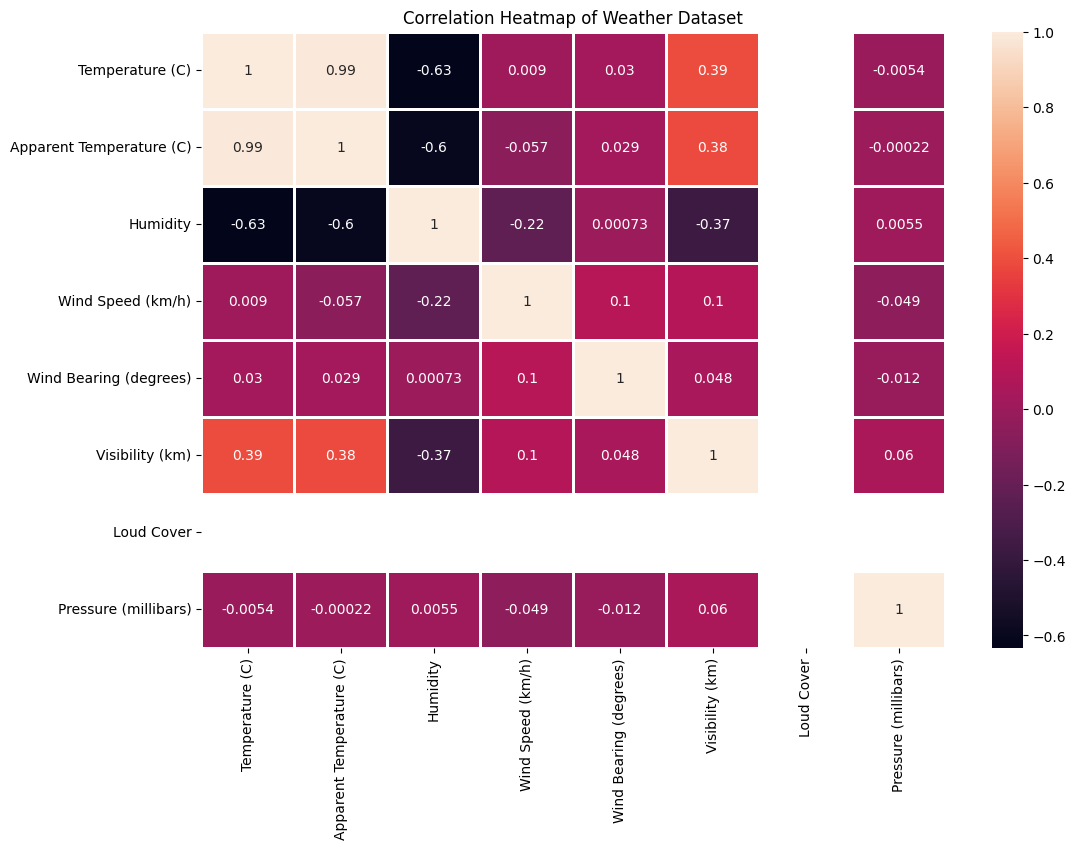

In [43]:
#Question 2: How do the features relate to each other and to the weather conditions?
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=2)
plt.title('Correlation Heatmap of Weather Dataset')
plt.show()

In [50]:
#Question 3: What are the steps involved in preprocessing the dataset for machine learning?
#Handling missing values
#Encoding categorical variables (if any)
#Feature scaling
#Splitting the dataset into training and testing sets

#4. How do we select the best model for our dataset? Hint :
#use different regression models and compare theirmetrics
#5. What metrics should we use to evaluate the performance of our weather prediction model?

X = df.drop(columns=['Temperature (C)'])
y = df['Temperature (C)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2 Score': r2}

# Display the results
print(tabulate(results.items(), headers=['Model', 'Metrics'], tablefmt='pretty'))

# Select the best model based on R2 score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
best_model = models[best_model_name]

# Predict using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title(f'{best_model_name} Predicted vs True Values')
plt.savefig('predicted_vs_true.png')  # Save the plot
plt.close()  # Close the plot to avoid the non-interactive backend issue


+---------------------+---------------------------------------------------------------+
|        Model        |                            Metrics                            |
+---------------------+---------------------------------------------------------------+
|  Linear Regression  |  {'MSE': 0.8775503865430975, 'R2 Score': 0.9903726765133518}  |
|    Decision Tree    | {'MSE': 0.010110896855309156, 'R2 Score': 0.9998890765974707} |
|    Random Forest    | {'MSE': 0.00319914457786738, 'R2 Score': 0.9999649032121642}  |
|  Gradient Boosting  | {'MSE': 0.03333951017930737, 'R2 Score': 0.9996342429400015}  |
|      AdaBoost       |  {'MSE': 1.0603680890340292, 'R2 Score': 0.9883670422068144}  |
| K-Nearest Neighbors |   {'MSE': 0.8129317914706713, 'R2 Score': 0.99108158636919}   |
+---------------------+---------------------------------------------------------------+


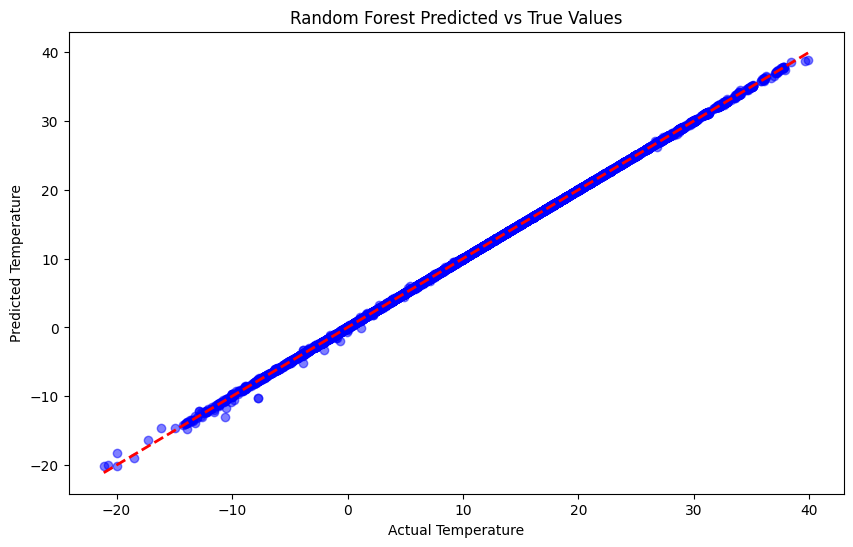

In [51]:
y_pred_best = best_model.predict(X_test_scaled)
# Plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title(f'{best_model_name} Predicted vs True Values')
plt.savefig('predicted_vs_true.png')  # Save the plot
plt.show()
plt.close() 